### Reconstruction 

In [21]:
import tensorflow  as tf

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
import matplotlib.pyplot as plt

### Data Preprocessing

In [24]:
(x_train,_), (x_test,_)= mnist.load_data()

In [25]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

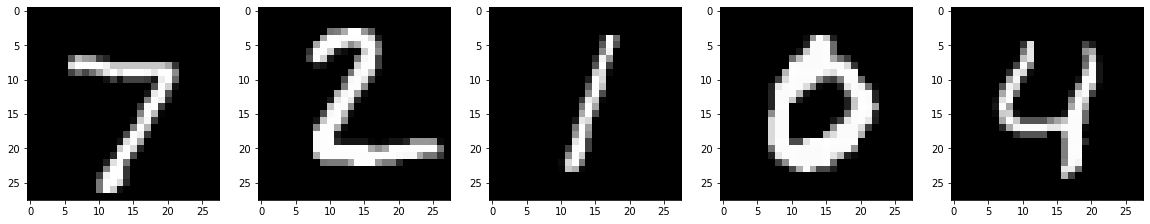

In [28]:
count=5
plt.figure(figsize=(20,10))

for i in range(count):
    ax = plt.subplot(2, count, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
plt.show()
    

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input


In [30]:
import numpy as np

In [31]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [32]:
x_train.shape

(60000, 784)

### Deep Encoder Modelling

In [4]:
input_l=Input(shape=(784,))

encoding_1=Dense(256, activation='relu')(input_l)
encoding_2=Dense(128, activation='relu')(encoding_1)

bottleneck=Dense(32, activation='relu')(encoding_2)

decoding_1=Dense(128, activation='relu')(bottleneck)
decoding_2=Dense(256, activation='relu')(decoding_1)

output_l=Dense(784, activation='sigmoid')(decoding_2)

autoencoder=Model(inputs=[input_l],outputs=[output_l])

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

In [11]:
from tensorflow.keras.utils import plot_model

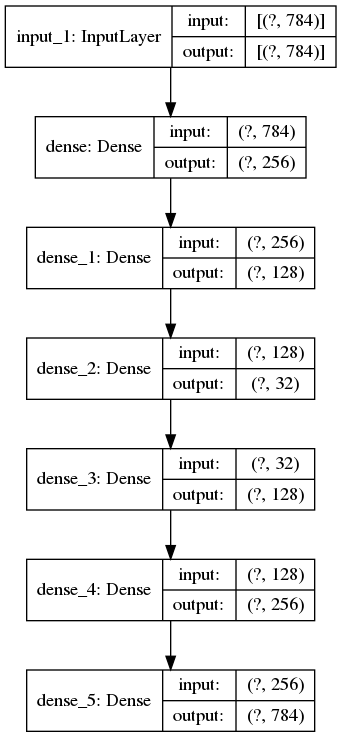

In [12]:
plot_model(autoencoder, to_file='model_plot_autoencoder.png', show_shapes=True, show_layer_names=True)

In [15]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [16]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


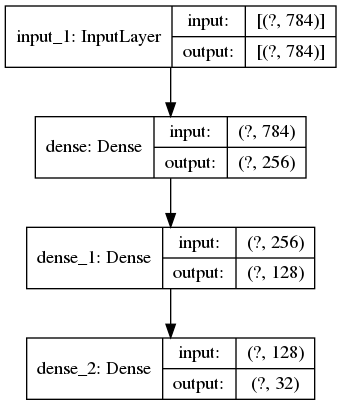

In [17]:
plot_model(encoder, to_file='model_plot_encoder.png', show_shapes=True, show_layer_names=True)

In [18]:
encoded_input=Input(shape=(32,))

decoded_layer_1=autoencoder.layers[-3](encoded_input)
decoded_layer_2=autoencoder.layers[-2](decoded_layer_1)

decoded=autoencoder.layers[-1](decoded_layer_2)

decoder=Model(inputs=[encoded_input],outputs=[decoded])

In [19]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


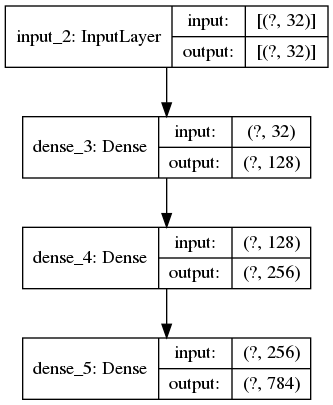

In [20]:
plot_model(decoder, to_file='model_plot_decoder.png', show_shapes=True, show_layer_names=True)

In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2173 - val_loss: 0.1387
Epoch 2/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1275 - val_loss: 0.1170
Epoch 3/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1139 - val_loss: 0.1082
Epoch 4/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1065 - val_loss: 0.1024
Epoch 5/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1014 - val_loss: 0.0981
Epoch 6/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0979 - val_loss: 0.0954
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0954 - val_loss: 0.0933
Epoch 8/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0933 - val_loss: 0.0919
Epoch 9/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0918 - val_

In [36]:
encoded= encoder.predict(x_test)
decoded = decoder.predict(encoded)

In [38]:
predicted_images=autoencoder.predict(x_test)

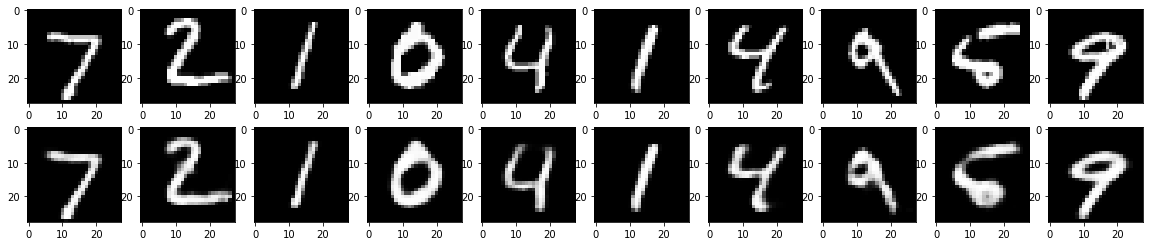

In [49]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    #print("\n Original Images \n")
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    #print("\n Autoencoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()

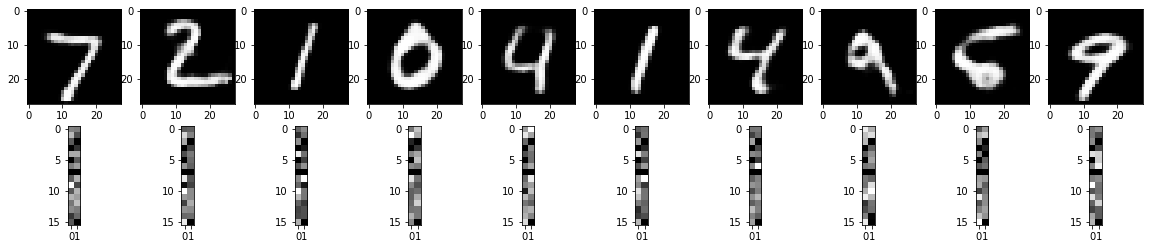

In [50]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    
    
    #print("\n Encoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()
    
plt.show()

### SImple Encoder Modelling

In [82]:
input_l=Input(shape=(784,))

bottleneck=Dense(32, activation='relu')(input_l)

output_l=Dense(784, activation='sigmoid')(bottleneck)

autoencoder=Model(inputs=[input_l],outputs=[output_l])

In [83]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


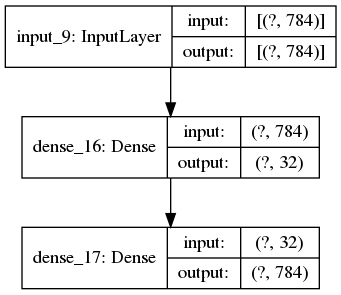

In [84]:
plot_model(autoencoder, to_file='model_plot_autoencoder_simple.png', show_shapes=True, show_layer_names=True)

In [85]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [86]:
encoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


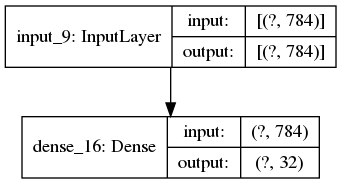

In [87]:
plot_model(encoder, to_file='model_plot_encoder_simple.png', show_shapes=True, show_layer_names=True)

In [57]:
encoded_input=Input(shape=(32,))

decoded=autoencoder.layers[-1](encoded_input)

decoder=Model(inputs=[encoded_input],outputs=[decoded])

In [58]:
decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


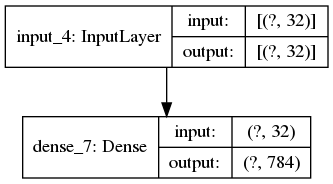

In [59]:
plot_model(decoder, to_file='model_plot_decoder_simple.png', show_shapes=True, show_layer_names=True)

In [60]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [61]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2780 - val_loss: 0.1918
Epoch 2/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1731 - val_loss: 0.1551
Epoch 3/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1453 - val_loss: 0.1341
Epoch 4/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1285 - val_loss: 0.1208
Epoch 5/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1175 - val_loss: 0.1117
Epoch 6/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1099 - val_loss: 0.1056
Epoch 7/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1048 - val_loss: 0.1015
Epoch 8/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1012 - val_loss: 0.0987
Epoch 9/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0988 - val_

In [62]:
predicted_images=autoencoder.predict(x_test)

In [63]:
encoded= encoder.predict(x_test)
decoded = decoder.predict(encoded)

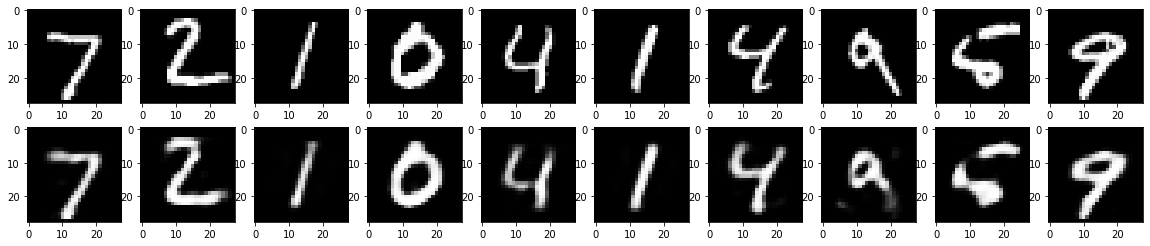

In [64]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    #print("\n Original Images \n")
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    #print("\n Autoencoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()

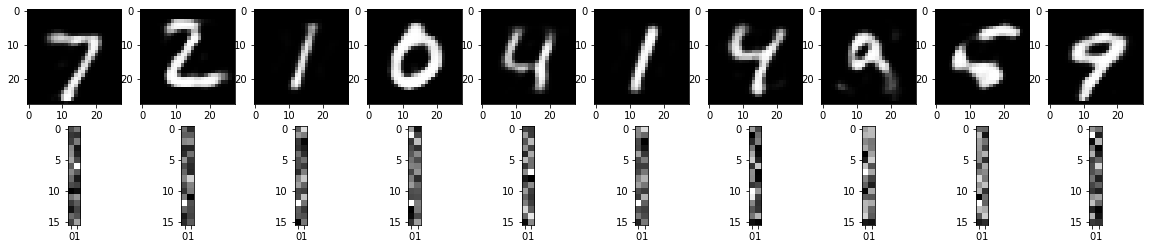

In [65]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    
    
    #print("\n Encoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()
    
plt.show()

### Sparse auto encoding

In [88]:
from tensorflow.keras.regularizers import l1

In [89]:
input_l=Input(shape=(784,))

encoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(input_l)

bottleneck=Dense(32, activation='relu', activity_regularizer=l1(0.001))(encoding_1)

decoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(bottleneck)

output_l=Dense(784, activation='sigmoid')(decoding_1)

autoencoder=Model(inputs=[input_l],outputs=[output_l])

In [90]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_21 (Dense)             (None, 784)               201488    
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


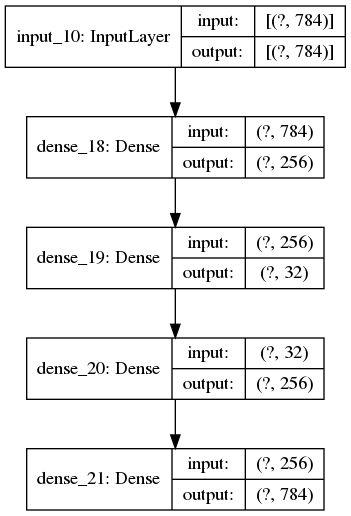

In [91]:
plot_model(autoencoder, to_file='model_plot_autoencoder_sparse.png', show_shapes=True, show_layer_names=True)

In [92]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [93]:
encoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 32)                8224      
Total params: 209,184
Trainable params: 209,184
Non-trainable params: 0
_________________________________________________________________


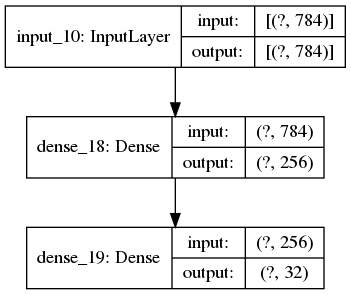

In [94]:
plot_model(encoder, to_file='model_plot_encoder_sparse.png', show_shapes=True, show_layer_names=True)

In [95]:
encoded_input=Input(shape=(32,))

decoded_layer_2=autoencoder.layers[-2](encoded_input)

decoded=autoencoder.layers[-1](decoded_layer_2)

decoder=Model(inputs=[encoded_input],outputs=[decoded])

In [96]:
decoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_21 (Dense)             (None, 784)               201488    
Total params: 209,936
Trainable params: 209,936
Non-trainable params: 0
_________________________________________________________________


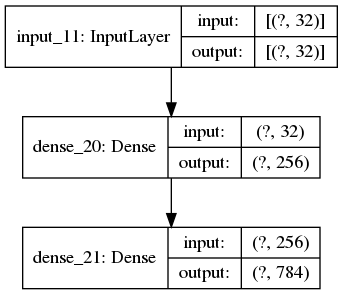

In [97]:
plot_model(decoder, to_file='model_plot_decoder_sparse.png', show_shapes=True, show_layer_names=True)

In [98]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [99]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3737 - val_loss: 0.2732
Epoch 2/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2432 - val_loss: 0.2197
Epoch 3/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2096 - val_loss: 0.2006
Epoch 4/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1956 - val_loss: 0.1896
Epoch 5/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1859 - val_loss: 0.1810
Epoch 6/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1780 - val_loss: 0.1736
Epoch 7/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1717 - val_loss: 0.1684
Epoch 8/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1668 - val_loss: 0.1635
Epoch 9/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1623 - val_

In [100]:
predicted_images=autoencoder.predict(x_test)

In [101]:
encoded= encoder.predict(x_test)
decoded = decoder.predict(encoded)

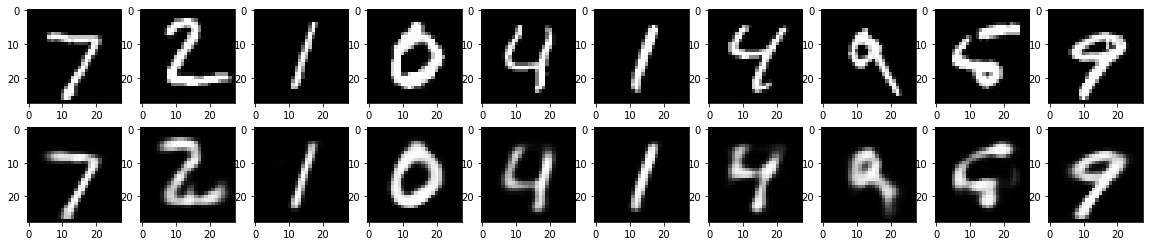

In [102]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    #print("\n Original Images \n")
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    #print("\n Autoencoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()

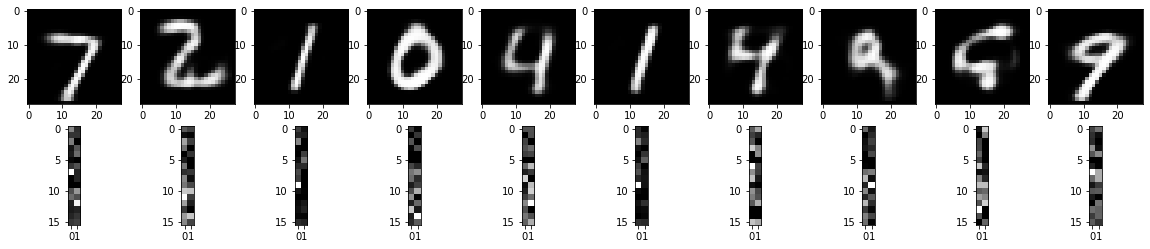

In [103]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    
    
    #print("\n Encoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16, 2))
    plt.gray()
    
plt.show()